In [0]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from matplotlib import pyplot as plt

%matplotlib inline

# torch.Tensor
* 다차원의 행렬을 표현할 때 사용되는 numpy의 ndarray와 비슷한 자료형.

* GPU를 효율적으로 사용할 수 있다.


## torch.zeros
torch.zeros를 이용해서 tensor를 만들 수 있다.


In [0]:
y = torch.zeros((1, 2))
print(y)

tensor([[0., 0.]])


## torch.tensor
torch.tensor를 이용해 파이썬 변수를 Tensor로 변환할 수 있다.

In [0]:
x = torch.tensor(1.)
y = torch.tensor([0., 1., 2., 3.])
print(x, y)

tensor(1.) tensor([0., 1., 2., 3.])


## 사칙연산
Tensor로 사칙연산, 내적 등의 연산을 할 수 있다.

In [0]:
x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[5, 6], [7, 8]])
print(x + y)
print(x * y)

tensor([[ 6,  8],
        [10, 12]])
tensor([[ 5, 12],
        [21, 32]])


## cuda
torch.cuda.is_available()가 True일 경우, GPU로 Tensor를 옮겨 연산 속도를 높일 수 있다.

In [0]:
x = torch.zeros((1, 2))
if torch.cuda.is_available():
  x = x.cuda()
print(x)

tensor([[0., 0.]], device='cuda:0')


## item
값이 하나뿐이라면, item을 이용해 파이썬 정수로 바꿀 수 있다.

In [0]:
x = torch.tensor([[1.]])
n = x.item()
print(n)

1.0


## view
view를 이용해 Tensor의 shape를 바꿀 수 있다.

In [0]:
x = torch.tensor([1., 2., 3., 4.])
y = x.view(-1, 2)
print(x)
print(y)

tensor([1., 2., 3., 4.])
tensor([[1., 2.],
        [3., 4.]])


## backward
Tensor의 backward로, requires_grad=True인 Tensor들이 포함된 연산들에 대해 Backpropagation을 할 수 있다.

In [0]:
w = torch.tensor([1., 2.], requires_grad=True)
x = torch.tensor([[1., 1.]])
p = w * x
p = p.mean()
p.backward()
print(w.grad)

tensor([0.5000, 0.5000])


## [예제1.1] Tensor로 linear regression

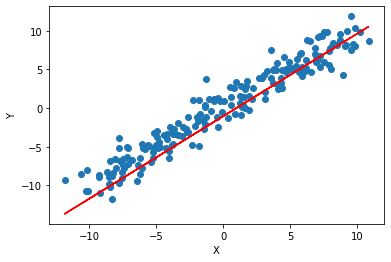

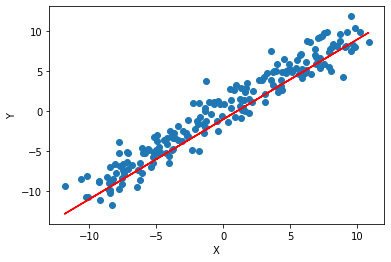

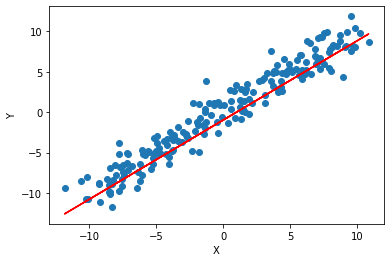

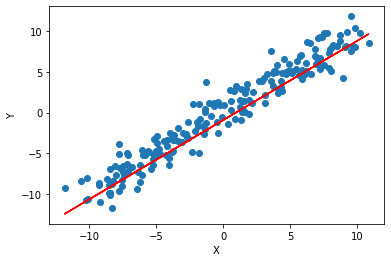

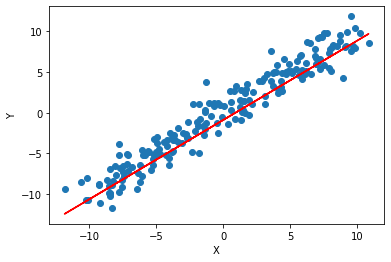

In [0]:
# y=x 그래프에 노이즈를 섞어 input과 target을 생성한다. 
input = torch.arange(-10., 10., 0.1)
target = torch.arange(-10., 10., 0.1)
input += torch.randn(input.shape)
target += torch.randn(target.shape)
input = input.reshape(-1, 1)
target = target.reshape(-1, 1)

# 무작위 텐서 w, b를 생성한다.
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

lr = 0.001

for i in range(100):
  # y = wx + b
  output = w * input + b

  # 오차를 계산한다.
  loss = (output - target)**2
  loss = loss.mean()

  # 오차 역전파를 수행한다.
  # w.grad와 b.grad에 각각의 gradient가 저장된다.
  loss.backward()

  # 연산 추적을 잠깐 멈추고, gradient descent를 수행한다.
  with torch.no_grad():
    w -= lr * w.grad
    b -= lr * b.grad

    # gradient를 0으로 초기화한다.
    w.grad.zero_()
    b.grad.zero_()

  # 20번마다 그래프로 결과를 확인한다.
  if i % 20 == 0:
    plt.scatter(input.detach().numpy(), target.detach().numpy())
    plt.plot(input.detach().numpy(), output.detach().numpy(), color='red')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

# torch.nn

torch.nn에 있는 Module 클래스는 복잡한 신경망 구현을
효율적으로 할 수 있게 도와준다.

이후 슬라이드에서 다룰 클래스들은 모두 Module의 서브클래스이다.


In [0]:
m = nn.Linear(2, 1)
for p in m.parameters():
  print(p)

Parameter containing:
tensor([[-0.3438, -0.3657]], requires_grad=True)
Parameter containing:
tensor([-0.2118], requires_grad=True)


## torch.nn.Linear(in_features, out_features, bias=True)
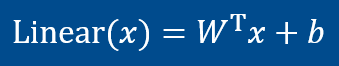

In [0]:
m = nn.Linear(2, 1)
input = torch.tensor([[1.0, 1.0]])
output = m(input)
print(m.weight)
print(m.bias)
print(output)

Parameter containing:
tensor([[-0.6533, -0.0920]], requires_grad=True)
Parameter containing:
tensor([-0.3022], requires_grad=True)
tensor([[-1.0475]], grad_fn=<AddmmBackward>)


## torch.nn.ReLU(inplace=False)

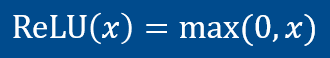

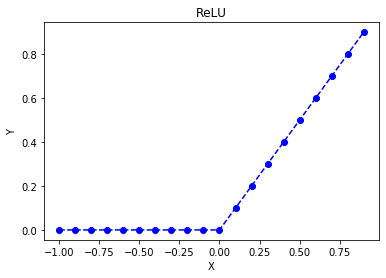

In [0]:
# ReLU 그래프
m = nn.ReLU()
input = torch.arange(-1., 1., 0.1)
output = m(input)
plt.plot(input, output, 'bo--')
plt.title('ReLU')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [0]:
m = nn.ReLU()
input = torch.tensor([-1.])
output = m(input)
print(input, output)

tensor([-1.]) tensor([0.])


inplace=True일 경우, input으로 들어온 Tensor를 수정한다.

In [0]:
m = nn.ReLU(inplace=True)
input = torch.tensor([-1.])
output = m(input)
print(input, output)

tensor([0.]) tensor([0.])


## torch.nn.Tanh()

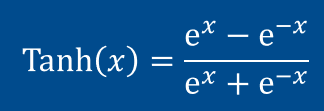

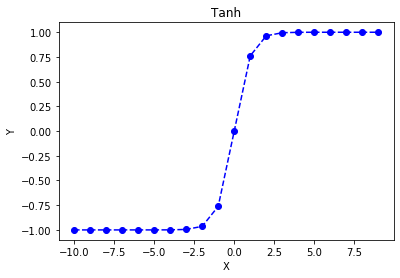

In [0]:
# Tanh 그래프
m = nn.Tanh()
input = torch.arange(-10., 10., 1.)
output = m(input)
plt.plot(input, output, 'bo--')
plt.title('Tanh')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [0]:
m = nn.Tanh()
input = torch.tensor([1., -1.])
output = m(input)
print(output)

tensor([ 0.7616, -0.7616])


## torch.nn.Conv2d(in_channels, out_channels, kernel_size, padding=1)

In [0]:
m = nn.Conv2d(33, 12, 4, padding=2)
input = torch.randn(5, 33, 15, 15)
output = m(input)
print(input.shape, output.shape)

torch.Size([5, 33, 15, 15]) torch.Size([5, 12, 16, 16])


## torch.nn.Sequential(*args)

args에 전달된 순서대로 Module을 연결해 새로운 Module을 만든다.

In [0]:
model = nn.Sequential(
    nn.Conv2d(1, 20, 5),
    nn.ReLU(),
    nn.Conv2d(20, 64, 5),
    nn.ReLU()
)
input = torch.randn(5, 1, 15, 15)
output = model(input)
print(input.shape)
print(output.shape)

torch.Size([5, 1, 15, 15])
torch.Size([5, 64, 7, 7])


## 사용자 정의 Module
이전 슬라이드에서 다루었던 Module들 보다 더 복잡한 모델을
원한다면, Module의 서브클래스를 정의하면 된다.

In [0]:
class Network(nn.Module):
  def __init__(self, input_dim):
    super(Netword, self).__init__()
    self.linear = nn.Linear(input_dim, 128)
    self.relu = nn.ReLU()
  def forward(self, x):
    return self.relu(self.linear(x))

## parameters

Module의 parameters를 이용하면, Module에 있는 Tensor중에서 학습시킬 수 있는(requires_grad=True) Tensor를 추출할 수 있다.

In [0]:
m = nn.Linear(2, 1)
for p in m.parameters():
  print(p)

Parameter containing:
tensor([[ 0.1289, -0.5449]], requires_grad=True)
Parameter containing:
tensor([0.2633], requires_grad=True)


## [예제1.2] nn.Linear로 linear regression

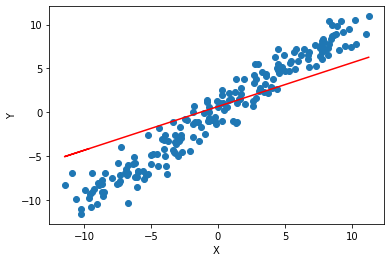

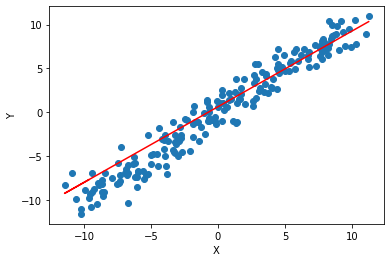

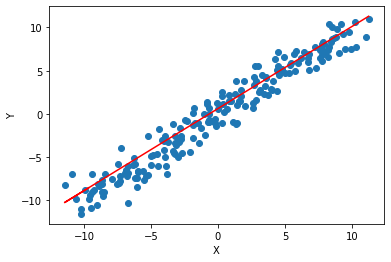

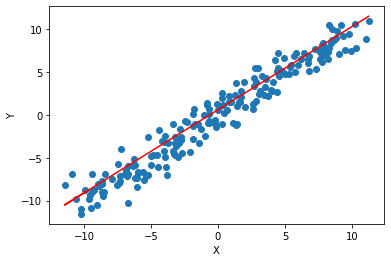

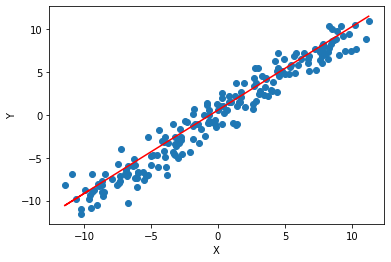

In [0]:
# y=x 그래프에 노이즈를 섞어 input과 target을 생성한다. 
input = torch.arange(-10., 10., 0.1)
target = torch.arange(-10., 10., 0.1)
input += torch.randn(input.shape)
target += torch.randn(target.shape)
input = input.reshape(-1, 1)
target = target.reshape(-1, 1)

# 아까는 w, b를 직접 만들었지만, 이번에는 nn.Linear를 사용한다.
model = nn.Linear(1, 1)

lr = 0.001

for i in range(100):
  # y = wx + b
  output = model(input)

  # 오차를 계산한다.
  loss = (output - target)**2
  loss = loss.mean()

  # model의 parameters의 gradient를 0으로 초기화한다.
  model.zero_grad()

  # 오차 역전파를 수행한다.
  loss.backward()

  # model의 parameters를 가져와 gradient descent 수행한다.
  for param in model.parameters():
    param.data -= lr * param.grad.data

  # 20번마다 그래프로 결과를 확인한다.
  if i % 20 == 0:
    plt.scatter(input.detach().numpy(), target.detach().numpy())
    plt.plot(input.detach().numpy(), output.detach().numpy(), color='red')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

# torch.nn.functional
softmax, mse_loss 등 필요한 함수들이 구현되어 있는 패키지

보통 F라는 이름으로 import해서 사용한다.


In [0]:
import torch.nn.functional as F

## F.log_softmax(input, dim=None)

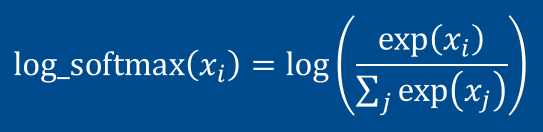


In [0]:
input = torch.randn(2, 3)
pi = F.log_softmax(input, dim=1)
print(pi)

tensor([[-0.7529, -1.0355, -1.7491],
        [-2.9141, -0.1099, -2.9999]])


## F.mse_loss(input, target)
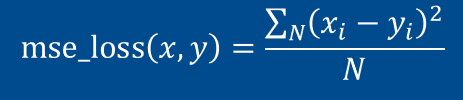

In [0]:
input = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5)
loss = F.mse_loss(input, target)
loss.backward()

## [예제1.3] F.mse_loss로 linear regression

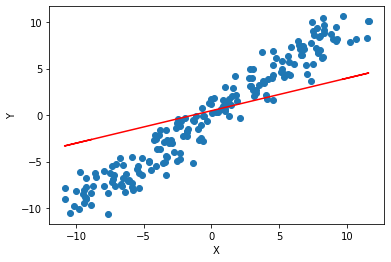

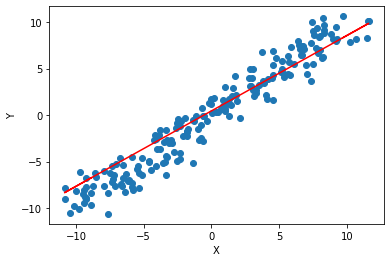

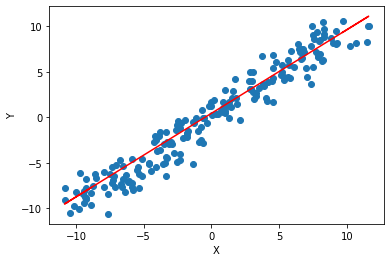

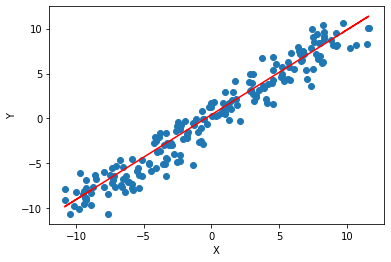

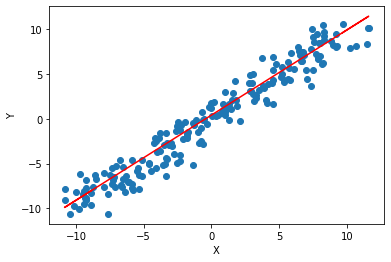

In [0]:
# y=x 그래프에 노이즈를 섞어 input과 target을 생성한다. 
input = torch.arange(-10., 10., 0.1)
target = torch.arange(-10., 10., 0.1)
input += torch.randn(input.shape)
target += torch.randn(target.shape)
input = input.reshape(-1, 1)
target = target.reshape(-1, 1)

# 아까는 w, b를 직접 만들었지만, 이번에는 nn.Linear를 사용한다.
model = nn.Linear(1, 1)

lr = 0.001

for i in range(100):
  # y = wx + b
  output = model(input)

  # 이번에는 F.mse_loss를 이용해 오차를 계산한다.
  loss = F.mse_loss(output, target)

  # model의 parameters의 gradient를 0으로 초기화한다.
  model.zero_grad()

  # 오차 역전파를 수행한다.
  loss.backward()

  # model의 parameters를 가져와 gradient descent 수행한다.
  for param in model.parameters():
    param.data -= lr * param.grad.data

  # 20번마다 그래프로 결과를 확인한다.
  if i % 20 == 0:
    plt.scatter(input.detach().numpy(), target.detach().numpy())
    plt.plot(input.detach().numpy(), output.detach().numpy(), color='red')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

# torch.optim

다양한 최적화 알고리즘이 구현되어 있는 패키지



1. optimizer.zero_grad()로 각 Tensor의 grad를 초기화한다.
2. loss.backward()로 grad를 업데이트한다.
3. optimizer.step()으로 grad를 이용해 Tensor를 업데이트한다.





## torch.optim.SGD(params, lr, momentum=0, weight_decay=0)
stochastic gradient descent가 구현되어 있는 클래스이다.

옵션으로 momentum, weight_decay를 추가할 수 있다.

In [0]:
model = nn.Linear(8, 16)
opt = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
opt.zero_grad()
input = torch.randn(8)
output = model(input)
target = torch.randn(16)
loss = F.mse_loss(output, target)
loss.backward()
opt.step()

## torch.optim.Adam(params, lr=0.001)
Adam 알고리즘이 구현되어 있는 클래스이다.

In [0]:
model = nn.Linear(8, 16)
opt = optim.Adam(model.parameters(), lr=0.001)
opt.zero_grad()
input = torch.randn(8)
output = model(input)
target = torch.randn(16)
loss = F.mse_loss(output, target)
loss.backward()
opt.step()

## [예제1.4] Adam으로 linear regression

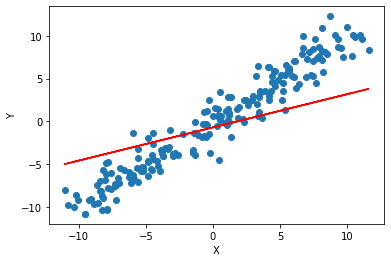

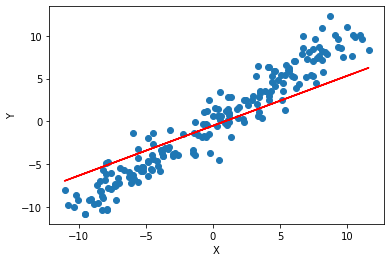

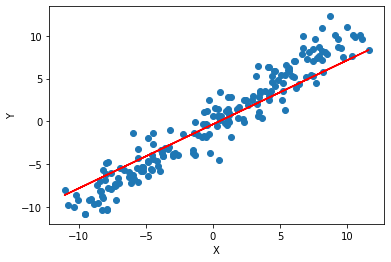

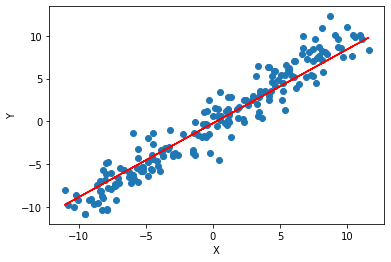

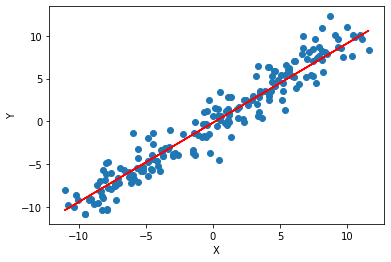

In [0]:
# y=x 그래프에 노이즈를 섞어 input과 target을 생성한다. 
input = torch.arange(-10., 10., 0.1)
target = torch.arange(-10., 10., 0.1)
input += torch.randn(input.shape)
target += torch.randn(target.shape)
input = input.reshape(-1, 1)
target = target.reshape(-1, 1)

# 아까는 w, b를 직접 만들었지만, 이번에는 nn.Linear를 사용한다.
model = nn.Linear(1, 1)

# 이번에는 Adam optimizer를 사용한다.
opt = optim.Adam(model.parameters(), lr=0.01)
opt.zero_grad()

for i in range(100):
  # y = wx + b
  output = model(input)

  # 이번에는 F.mse_loss를 이용해 오차를 계산한다.
  loss = F.mse_loss(output, target)

  # model의 parameters의 gradient를 0으로 초기화한다.
  model.zero_grad()

  # 오차 역전파를 수행한다.
  loss.backward()

  # 그냥 gradient descent 하던 부분을, Adam optimizer를 쓰도록 수정한다.
  opt.step()

  # 20번마다 그래프로 결과를 확인한다.
  if i % 20 == 0:
    plt.scatter(input.detach().numpy(), target.detach().numpy())
    plt.plot(input.detach().numpy(), output.detach().numpy(), color='red')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

# 모델 저장/불러오기


## torch.save(obj, f)
obj 객체를 f라는 이름으로 저장한다.

model을 저장하려면 obj에 model.state_dict()를 넣어주면 된다.


In [0]:
torch.save(model.state_dict(), 'checkpoint.bin')

## torch.load(f)
f라는 이름의 파일을 불러와 객체로 만든다.

model.state_dict()를 저장했으면, 불러올 때는 model.load_state_dict를 이용하면 된다.


In [0]:
model.load_state_dict(torch.load('checkpoint.bin'))

<All keys matched successfully>